In [1]:
import pandas as pd
import glob 
import matplotlib.pyplot as plt
import re
from src.plotting_tools.cms_format import cms_format_fig, cms_style
cms_style()

from src.assets.lumi import lumi_dict

In [2]:
era = '201X'
output_dir = 'exo-datacards/EXO-22-006/'
output = '/eos/cms/store/group/phys_exotica/bffZprime/assets_may_23'


In [6]:
filestring = '{}/combine_data/model_ind/out/{}/*.out'.format(output_dir, era)
files = glob.glob(filestring)
files

['exo-datacards/EXO-22-006//combine_data/model_ind/out/201X/datacard_125_0p5_0b.txt1604087.0.out',
 'exo-datacards/EXO-22-006//combine_data/model_ind/out/201X/datacard_125_0p5_1b1s.txt1604087.2.out',
 'exo-datacards/EXO-22-006//combine_data/model_ind/out/201X/datacard_200_0p5_1b.txt1604087.16.out',
 'exo-datacards/EXO-22-006//combine_data/model_ind/out/201X/datacard_SR1_200_0p5_1b.txt1604087.41.out',
 'exo-datacards/EXO-22-006//combine_data/model_ind/out/201X/datacard_125_0p5_1s.txt1604087.3.out',
 'exo-datacards/EXO-22-006//combine_data/model_ind/out/201X/datacard_200_0p5_1b1s.txt1604087.17.out',
 'exo-datacards/EXO-22-006//combine_data/model_ind/out/201X/datacard_SR1_200_0p5_1b1s.txt1604087.42.out',
 'exo-datacards/EXO-22-006//combine_data/model_ind/out/201X/datacard_150_0p5_1b1s.txt1604087.7.out',
 'exo-datacards/EXO-22-006//combine_data/model_ind/out/201X/datacard_125_0p5_2b.txt1604087.4.out',
 'exo-datacards/EXO-22-006//combine_data/model_ind/out/201X/datacard_SR1_200_0p5_2b.txt16

In [88]:
multiplicities = ['0b(1b)', '0b(2b)', '1b', '1s', '1b+1s', '2b', '2s']
def getmultiplicity(text):
    selected_mul = "unkown"
    for mul in multiplicities:
        tmul = mul.replace('(', '-').replace(')', '-')
        tmul = '_{}.'.format(tmul)
        if tmul in text: 
            selected_mul=mul
    return selected_mul

In [89]:
def get_data_from_file(f):
    try:
        nJets = re.findall(r'SR[0-9]', f)[0]
    except:
        nJets = -1
    mass = int((re.findall(r'_([0-9]{3})_', f)[0]))
    try:
        dbs = re.findall(r'_(\d)p(\d+)_', f)[0]
    except:
        dbs = ['0','0']
    try:
        reg = re.findall(r'_(SR[0-9])_', f)[0]
    except:
        reg = 'Comb.'
    
    dbs = float(('{}.{}'.format(*dbs)))
    era = ((re.findall(r'(201.)',f)[0]))
    condor_run = int(re.findall('txt([0-9]+)\.',f)[0])
    multiplicity = getmultiplicity(f)
    with open(f, 'r') as _f:
        r = _f.read()
        limits = re.findall(r'Expected +(\d+.\d+)%: r < (\d+.\d+)',r)
        limits = {float(x): float(y) for (x,y) in limits}
        obs = re.findall(r'Observed Limit: r < (\d+.\d+)',r)
        if len(obs)==1: obs = float(obs[0])
        else: obs = 0
    return { "condor_run": condor_run, "nJets":nJets, "reg":reg, "multiplicity":multiplicity,
            "mass":mass, "dbs":dbs, "era": era, "obs": obs, **limits}

In [94]:
df = pd.DataFrame(list(map(get_data_from_file, files)))

In [95]:
# only keep latest run
max_run = max(df.condor_run.unique())
df = df[df.condor_run==max_run]
max_run

1716271

(array([ 1.,  6., 18., 18., 33., 21., 20., 17.,  9.,  4.]),
 array([0.99595786, 0.99672607, 0.99749427, 0.99826247, 0.99903068,
        0.99979888, 1.00056708, 1.00133528, 1.00210349, 1.00287169,
        1.00363989]),
 <BarContainer object of 10 artists>)

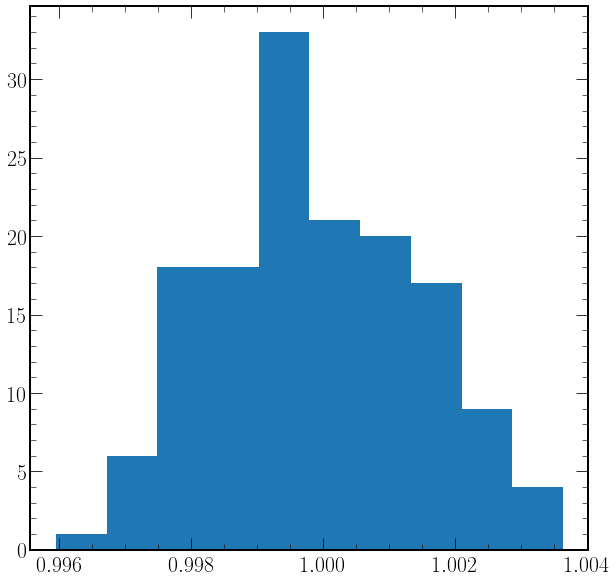

In [96]:
import matplotlib.pyplot as plt
# confirms observed is as expected (only for synthetic data)
plt.hist(df.obs/df[50.0])

In [97]:
df

,condor_run,nJets,reg,multiplicity,mass,dbs,era,obs,2.5,16.0,50.0,84.0,97.5
225,1716271,-1,Comb.,1b+1s,250,0.5,201X,0.6262,0.3369,0.4494,0.6250,0.8791,1.1863
226,1716271,SR1,SR1,0b(1b),125,0.5,201X,12.9360,7.0752,9.3652,12.9375,17.9397,23.7917
227,1716271,SR1,SR1,1b+1s,125,0.5,201X,20.6227,11.2793,14.9300,20.6250,28.5996,37.9287
228,1716271,-1,Comb.,2b,125,0.5,201X,1.5986,0.8571,1.1479,1.6016,2.2463,3.0150
229,1716271,SR1,SR1,1b,125,0.5,201X,2.2251,1.2177,1.6118,2.2266,3.0875,4.0802
...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,1716271,-1,Comb.,1b+1s,175,0.5,201X,0.8821,0.4759,0.6348,0.8828,1.2382,1.6732
368,1716271,-1,Comb.,2b,175,0.5,201X,0.8668,0.4675,0.6205,0.8672,1.2163,1.6325
369,1716271,-1,Comb.,1b,175,0.5,201X,0.7812,0.4242,0.5637,0.7812,1.0833,1.4417
370,1716271,-1,Comb.,1b,150,0.5,201X,1.2959,0.7092,0.9388,1.2969,1.7983,2.3933


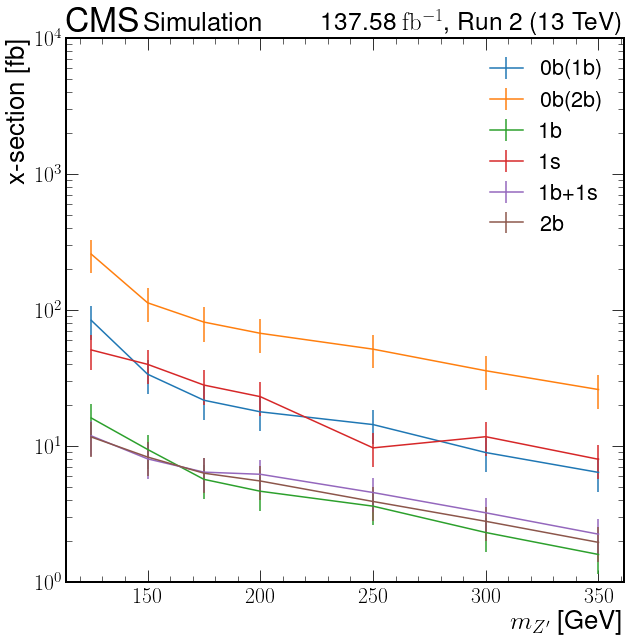

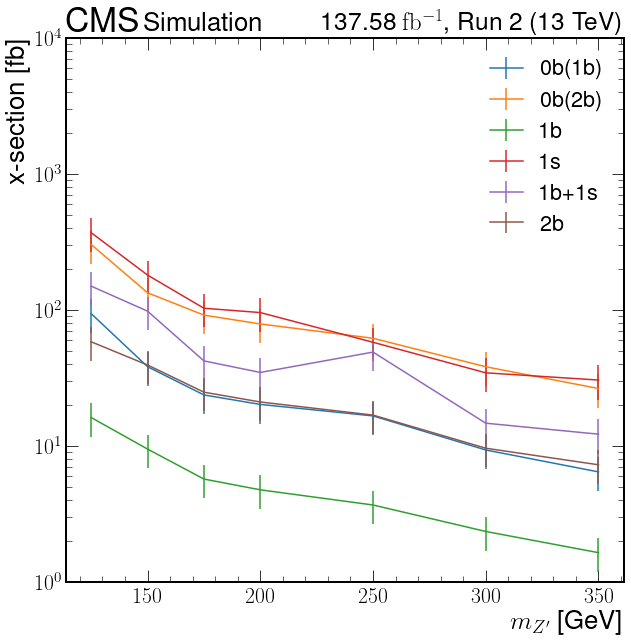

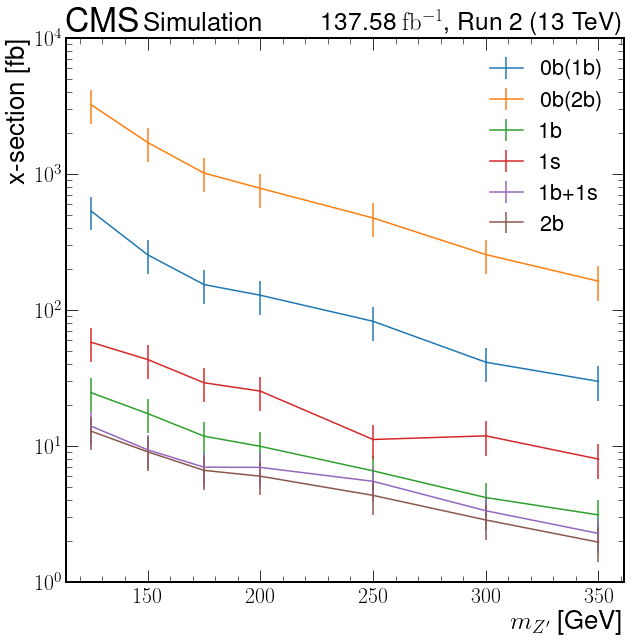

In [100]:
for reg in ['Comb.', 'SR1', 'SR2']:
    fig, ax = plt.subplots()
    cms_format_fig('Run 2', ax)
    ax.set_ylim(1,10000)
    ax.set_yscale('log')
    ax.set_ylabel('x-section [fb]')
    ax.set_xlabel('$m_{Z^{\prime}}$ [GeV]')
    for fs_type in multiplicities:
        if fs_type=='2s': continue
        tdf = df[(df.reg==reg) & (df.multiplicity==fs_type)]
        tdf = tdf.sort_values("mass")
        err = (tdf[50.0]-tdf[16.0])*1000/lumi_dict['Run 2']
        #print(fs_type, tdf[50.0]*1000/lumi_dict['Run 2'])
        ax.errorbar(tdf.mass, tdf[50.0]*1000/lumi_dict['Run 2'], yerr=err, label=fs_type)
    ax.legend()
    fig.savefig('{}/gen_b_s/{}_limit.pdf'.format(output, reg))
    

In [101]:
'{}/gen_b_s/{}_limit.pdf'.format(output, reg)

'/eos/cms/store/group/phys_exotica/bffZprime/assets_may_23/gen_b_s/SR2_limit.pdf'

AttributeError: 'DataFrame' object has no attribute 'multiplicty'

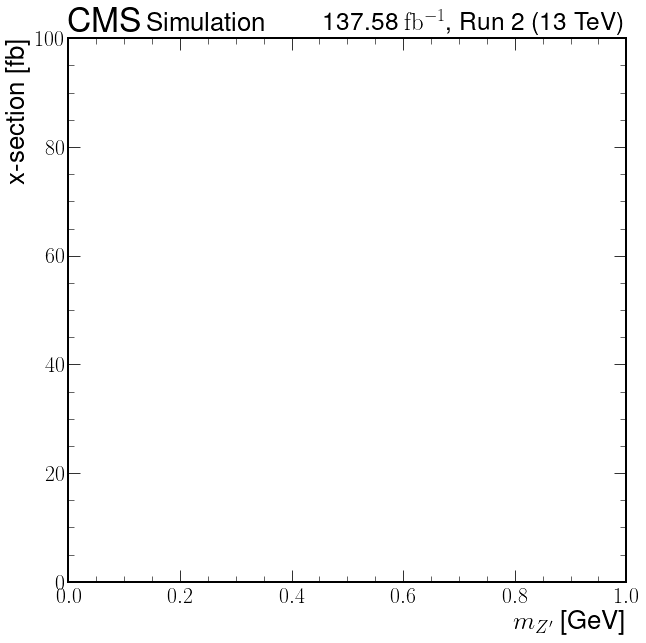

In [99]:
for reg in ['Comb.']:
    fig, ax = plt.subplots()
    cms_format_fig('Run 2', ax)
    ax.set_ylim(0,100)
    #ax.set_yscale('log')
    ax.set_ylabel('x-section [fb]')
    ax.set_xlabel('$m_{Z^{\prime}}$ [GeV]')
    for fs_type in ['0b', '1b', '1s', '1b+1s', '2b']:
        tdf = df[(df.reg==reg) & (df.multiplicty==fs_type)]
        tdf = tdf.sort_values("mass")
        err = (tdf[50.0]-tdf[16.0])*1000/lumi_dict['Run 2']
        
        print(fs_type, tdf[50.0]*1000/lumi_dict['Run 2'])
        ax.errorbar(tdf.mass, tdf[50.0]*1000/lumi_dict['Run 2'], yerr=err, label=fs_type)
    ax.legend()
    fig.savefig('{}/gen_b_s/{}_limit.pdf'.format(output, reg))
    

In [60]:
tdf = df[df.nJets=='SRX']

In [61]:
import numpy as np

In [62]:
def array_to_indicies(arr):
    unique_values = np.unique(arr)
    index_dict = {val:i for i, val in enumerate(unique_values)}
    return [index_dict[val] for val in arr]

In [63]:
x_val, y_val, z  = tdf.mass, tdf.dbs, tdf[50.0].values
x, y = array_to_indicies(x_val), array_to_indicies(y_val)
image = 0* np.empty( (np.unique(y).shape[0], np.unique(x).shape[0]) )
image[y,x] = z

Text(0.5, 1.0, '50% expected limits: counts')

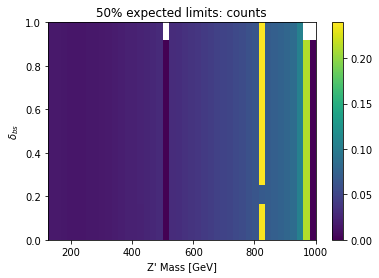

In [64]:
fig, ax = plt.subplots()
im_shows = ax.imshow(image, aspect='auto', extent=[x_val.min(),x_val.max(),y_val.min(),y_val.max()])
fig.colorbar(im_shows, ax=ax)
ax.set_xlabel("Z' Mass [GeV]")
ax.set_ylabel("$\delta_{bs}$")
ax.set_title('50% expected limits: counts')

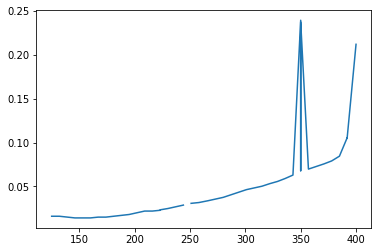

In [65]:
plt.plot(*list(zip(*sorted(zip(tdf.mass, tdf[50.0].values), key=lambda x: x[0]))))

In [66]:
df.to_csv('{}/combine_data/{}_count_limits.csv'.format(output_dir, era))

In [67]:
# don't run past
break

SyntaxError: 'break' outside loop (3400980095.py, line 2)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import uproot as upr

In [ ]:
upf = upr.open('/afs/cern.ch/work/r/rymuelle/public/nanoAODzPrime/CMSSW_12_1_0/src/bff_plotting_code_v3/assets_nov_2022/combine_data/2017/2017_shapes_df_input.root')

In [ ]:
upf.keys()

In [ ]:
plt.plot(upf['SR1-sys_0_nominal-background'].values())
plt.plot(upf['SR1-sys_0_jer_2017_Up-sig202'].values()*100)


In [ ]:
plt.plot(upf['SR1-sys_0_nominal-background'].values())
plt.plot(upf['SR1-sys_0_jer_2016_Up-sig202'].values()*100)
plt.plot(upf['SR1-sys_0_nominal-sig202'].values()*100)

plt.plot(upf['SR1-sys_0_jer_2016_Up-sig195'].values()*100)
plt.plot(upf['SR1-sys_0_nominal-sig202'].values()*100)